# Exploratory Data Analysis on Uncleaned Mobile Dataset
#### By Vedant Thakur

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [15]:
df = pd.read_csv('mobiles.csv')

In [16]:
df.head()

,mobile_name,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os
0,OPPO Reno 11,"₹29,990",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio
1,Poco X6 Pro 5G,"₹19,999",4.50,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio
2,Xiaomi Redmi Note 13 Pro Plus,"₹31,999",4.35,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
3,OPPO Reno 11 Pro,"₹40,990",4.75,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio
4,Xiaomi Redmi Note 13 Pro Max 5G,"₹33,999",4.00,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    1020 non-null   object 
 1   price          1020 non-null   object 
 2   rating         1020 non-null   float64
 3   specs_score    865 non-null    float64
 4   connectivity   1020 non-null   object 
 5   processor      1020 non-null   object 
 6   storage        1020 non-null   object 
 7   battery        1020 non-null   object 
 8   display        1020 non-null   object 
 9   camera         1020 non-null   object 
 10  extra_storage  1017 non-null   object 
 11  os             1009 non-null   object 
dtypes: float64(2), object(10)
memory usage: 95.8+ KB


In [18]:
df.isnull().sum()

mobile_name        0
price              0
rating             0
specs_score      155
connectivity       0
processor          0
storage            0
battery            0
display            0
camera             0
extra_storage      3
os                11
dtype: int64

In [19]:
df['mobile_name']

0                          OPPO Reno 11
1                        Poco X6 Pro 5G
2         Xiaomi Redmi Note 13 Pro Plus
3                      OPPO Reno 11 Pro
4       Xiaomi Redmi Note 13 Pro Max 5G
                     ...               
1015                     POCO M3 Pro 5G
1016                   Asus ROG Phone 6
1017           iQOO 7 (8GB RAM + 256GB)
1018                      Realme X7 Max
1019                 Xiaomi Mi Mix Fold
Name: mobile_name, Length: 1020, dtype: object

In [20]:
df['brand'] = df['mobile_name'].apply(lambda x: x.split()[0])
df['model_name'] = df['mobile_name'].apply(lambda x: x.split()[1])
df.drop(columns='mobile_name',inplace = True)
df["price"] = df["price"].apply(lambda x: x.split('₹')[1])

In [21]:
df.head()

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os,brand,model_name
0,"29,990",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno
1,"19,999",4.50,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio,Poco,X6
2,"31,999",4.35,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Xiaomi,Redmi
3,"40,990",4.75,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno
4,"33,999",4.00,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13,Xiaomi,Redmi


In [23]:
df['connectivity'][0]

'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster'

In [24]:
df['connectivity'] = df['connectivity'].apply(lambda x: ' '.join(re.findall(r'\b[345]G\b', x)))

In [25]:
df.head()

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os,brand,model_name
0,"29,990",4.70,86.0,3G 4G 5G,"Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno
1,"19,999",4.50,84.0,3G 4G 5G,"Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio,Poco,X6
2,"31,999",4.35,87.0,3G 4G 5G,"Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Xiaomi,Redmi
3,"40,990",4.75,88.0,3G 4G 5G,"Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno
4,"33,999",4.00,87.0,3G 4G 5G,"Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13,Xiaomi,Redmi


In [26]:
df['RAM'] = df['storage'].apply(lambda x: x.split()[0])
df['ROM'] = df['storage'].str.extract(r'(\d+)\s*GB inbuilt')

In [27]:
df.head()

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os,brand,model_name,RAM,ROM
0,"29,990",4.70,86.0,3G 4G 5G,"Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno,8,256
1,"19,999",4.50,84.0,3G 4G 5G,"Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio,Poco,X6,12,256
2,"31,999",4.35,87.0,3G 4G 5G,"Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Xiaomi,Redmi,8,256
3,"40,990",4.75,88.0,3G 4G 5G,"Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno,12,256
4,"33,999",4.00,87.0,3G 4G 5G,"Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13,Xiaomi,Redmi,12,256


In [32]:
df['processor'][0].split(',')[0]
df['processor'] = df['processor'].apply(lambda x: x.split(',')[0])

In [33]:
df['battery'][0]
df['battery_capacity'] = df['battery'].str.extract(r'(\d+)\s*\u2009?mAh')

In [34]:
df['battery_capacity'].unique()

array(['4800', '5500', '5000', '4600', '5200', '5100', '6000', '5160',
       '4400', '5400', '4500', '3349', '3279', '3240', '3900', '3700',
       '4422', '4383', '4700', '4880', '4325', nan, '3334', '5180',
       '4805', '4385', '3060', '6500', '3500', '4815', '3274', '4000',
       '5240', '5800', '7000', '4900', '3110', '2050', '4520', '4980',
       '2150', '2000', '3000', '7100', '4200', '4610', '1450', '4355',
       '4410', '1000', '4870', '4810', '9600', '4830', '4300', '2800',
       '4575', '3300', '5050', '5080', '4250', '1500', '2500', '3800',
       '4020', '4352', '1821', '800', '6700', '2750', '4050', '4820',
       '5020', '4350', '1480', '5300', '4290', '1900', '4110', '1150',
       '3100', '1300', '5580', '11000', '10800', '500', '4821', '4230'],
      dtype=object)

In [38]:
df['charging_speed'] = df['battery'].str.extract(r'(\d+)\s*W')

In [39]:
df.head()

,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os,brand,model_name,RAM,ROM,battery_capacity,charging_speed
0,"29,990",4.70,86.0,3G 4G 5G,Dimensity 8200,"8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno,8,256,4800,67
1,"19,999",4.50,84.0,3G 4G 5G,Dimensity 8300 Ultra,"12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio,Poco,X6,12,256,5500,90
2,"31,999",4.35,87.0,3G 4G 5G,Dimensity 7200 Ultra,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Xiaomi,Redmi,8,256,5000,120
3,"40,990",4.75,88.0,3G 4G 5G,Dimensity 8200,"12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno,12,256,4600,80
4,"33,999",4.00,87.0,3G 4G 5G,Snapdragon 7 Gen1,"12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13,Xiaomi,Redmi,12,256,5200,120


In [40]:
df.drop(columns=['battery','storage'],inplace = True)

In [41]:
df.head()

,price,rating,specs_score,connectivity,processor,display,camera,extra_storage,os,brand,model_name,RAM,ROM,battery_capacity,charging_speed
0,"29,990",4.70,86.0,3G 4G 5G,Dimensity 8200,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno,8,256,4800,67
1,"19,999",4.50,84.0,3G 4G 5G,Dimensity 8300 Ultra,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio,Poco,X6,12,256,5500,90
2,"31,999",4.35,87.0,3G 4G 5G,Dimensity 7200 Ultra,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Xiaomi,Redmi,8,256,5000,120
3,"40,990",4.75,88.0,3G 4G 5G,Dimensity 8200,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio,OPPO,Reno,12,256,4600,80
4,"33,999",4.00,87.0,3G 4G 5G,Snapdragon 7 Gen1,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13,Xiaomi,Redmi,12,256,5200,120


In [42]:
df['display'][43].split(',')[0]

'6.79 inches'

In [43]:
df['display_size'] = df['display'].apply(lambda x: x.split('inches')[0])

In [44]:
df['display_hz'] = df['display'].str.extract(r"(\d+)\s*Hz")

In [45]:
df['camera'][0]

'50\u2009MP + 32\u2009MP + 8\u2009MP Triple Rear & 32\u2009MP Front Camera'

In [46]:
df['rear_cameras'] = df['camera'].str.extract(r'(.+?MP(?: \+ .+?MP)*)\s+\w+\s+Rear')
df['front_camera'] = df['camera'].str.extract(r'(\d+)\s*MP Front')

In [47]:
df.drop(columns = ['display','camera'],inplace = True)

In [48]:
df.head()

,price,rating,specs_score,connectivity,processor,extra_storage,os,brand,model_name,RAM,ROM,battery_capacity,charging_speed,display_size,display_hz,rear_cameras,front_camera
0,"29,990",4.70,86.0,3G 4G 5G,Dimensity 8200,Android v14,No FM Radio,OPPO,Reno,8,256,4800,67,6.7,120,50 MP + 32 MP + 8 MP,32
1,"19,999",4.50,84.0,3G 4G 5G,Dimensity 8300 Ultra,Android v14,No FM Radio,Poco,X6,12,256,5500,90,6.67,120,64 MP + 8 MP + 2 MP,16
2,"31,999",4.35,87.0,3G 4G 5G,Dimensity 7200 Ultra,Memory Card Not Supported,Android v13,Xiaomi,Redmi,8,256,5000,120,6.67,120,200 MP + 8 MP + 2 MP,16
3,"40,990",4.75,88.0,3G 4G 5G,Dimensity 8200,Android v14,No FM Radio,OPPO,Reno,12,256,4600,80,6.74,120,50 MP + 32 MP + 8 MP,32
4,"33,999",4.00,87.0,3G 4G 5G,Snapdragon 7 Gen1,Memory Card Not Supported,Android v13,Xiaomi,Redmi,12,256,5200,120,6.67,144,200 MP + 13 MP + 8 MP,32


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             1020 non-null   object 
 1   rating            1020 non-null   float64
 2   specs_score       865 non-null    float64
 3   connectivity      1020 non-null   object 
 4   processor         1020 non-null   object 
 5   extra_storage     1017 non-null   object 
 6   os                1009 non-null   object 
 7   brand             1020 non-null   object 
 8   model_name        1020 non-null   object 
 9   RAM               1020 non-null   object 
 10  ROM               982 non-null    object 
 11  battery_capacity  1002 non-null   object 
 12  charging_speed    876 non-null    object 
 13  display_size      1020 non-null   object 
 14  display_hz        784 non-null    object 
 15  rear_cameras      893 non-null    object 
 16  front_camera      927 non-null    object 


In [50]:
df.isnull().sum()

price                 0
rating                0
specs_score         155
connectivity          0
processor             0
extra_storage         3
os                   11
brand                 0
model_name            0
RAM                   0
ROM                  38
battery_capacity     18
charging_speed      144
display_size          0
display_hz          236
rear_cameras        127
front_camera         93
dtype: int64

In [53]:
# Filling columns where dtypes is object with mode(The most frequent value)
for i in df.select_dtypes('object').columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [54]:
df.isnull().sum()

price                 0
rating                0
specs_score         155
connectivity          0
processor             0
extra_storage         0
os                    0
brand                 0
model_name            0
RAM                   0
ROM                   0
battery_capacity      0
charging_speed        0
display_size          0
display_hz            0
rear_cameras          0
front_camera          0
dtype: int64

In [55]:
# Filling column with the mean value
df['specs_score'] = df['specs_score'].fillna(df['specs_score'].mean())

In [56]:
df.isnull().sum()

price               0
rating              0
specs_score         0
connectivity        0
processor           0
extra_storage       0
os                  0
brand               0
model_name          0
RAM                 0
ROM                 0
battery_capacity    0
charging_speed      0
display_size        0
display_hz          0
rear_cameras        0
front_camera        0
dtype: int64

In [57]:
df.head()

,price,rating,specs_score,connectivity,processor,extra_storage,os,brand,model_name,RAM,ROM,battery_capacity,charging_speed,display_size,display_hz,rear_cameras,front_camera
0,"29,990",4.70,86.0,3G 4G 5G,Dimensity 8200,Android v14,No FM Radio,OPPO,Reno,8,256,4800,67,6.7,120,50 MP + 32 MP + 8 MP,32
1,"19,999",4.50,84.0,3G 4G 5G,Dimensity 8300 Ultra,Android v14,No FM Radio,Poco,X6,12,256,5500,90,6.67,120,64 MP + 8 MP + 2 MP,16
2,"31,999",4.35,87.0,3G 4G 5G,Dimensity 7200 Ultra,Memory Card Not Supported,Android v13,Xiaomi,Redmi,8,256,5000,120,6.67,120,200 MP + 8 MP + 2 MP,16
3,"40,990",4.75,88.0,3G 4G 5G,Dimensity 8200,Android v14,No FM Radio,OPPO,Reno,12,256,4600,80,6.74,120,50 MP + 32 MP + 8 MP,32
4,"33,999",4.00,87.0,3G 4G 5G,Snapdragon 7 Gen1,Memory Card Not Supported,Android v13,Xiaomi,Redmi,12,256,5200,120,6.67,144,200 MP + 13 MP + 8 MP,32


In [58]:
df['price'] = df['price'].replace('[^0-9]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [59]:
columns_to_convert = ['RAM', 'ROM', 'battery_capacity', 'charging_speed', 'display_hz' ,'front_camera']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [60]:
df['display_size'] = pd.to_numeric(df['display_size'], errors='coerce')

In [61]:
df.isna().sum()

price                0
rating               0
specs_score          0
connectivity         0
processor            0
extra_storage        0
os                   0
brand                0
model_name           0
RAM                  5
ROM                  0
battery_capacity     0
charging_speed       0
display_size        18
display_hz           0
rear_cameras         0
front_camera         0
dtype: int64

In [62]:
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())

### Data Visualisation

In [65]:
df['brand'].value_counts()

brand
Samsung      131
Xiaomi       124
Vivo         116
Realme        87
Motorola      55
OnePlus       53
OPPO          44
Poco          39
Tecno         39
Apple         39
Infinix       37
iQOO          36
Honor         27
Nokia         26
Oppo          21
itel          17
Lava          16
Nubia         16
Google        12
Asus          11
Sony           8
Jio            7
Nothing        7
Itel           6
Huawei         5
Meizu          5
iKall          5
POCO           3
Snexian        3
Duoqin         2
Blackview      2
Redmi          2
Ulefone        2
BlackZone      1
JIo            1
Tesla          1
Gionee         1
Letv           1
Namotel        1
Solana         1
MTR            1
LG             1
Docoss         1
Oukitel        1
Doogee         1
Cellecor       1
Fairphone      1
Unihertz       1
HTC            1
ZTE            1
Name: count, dtype: int64

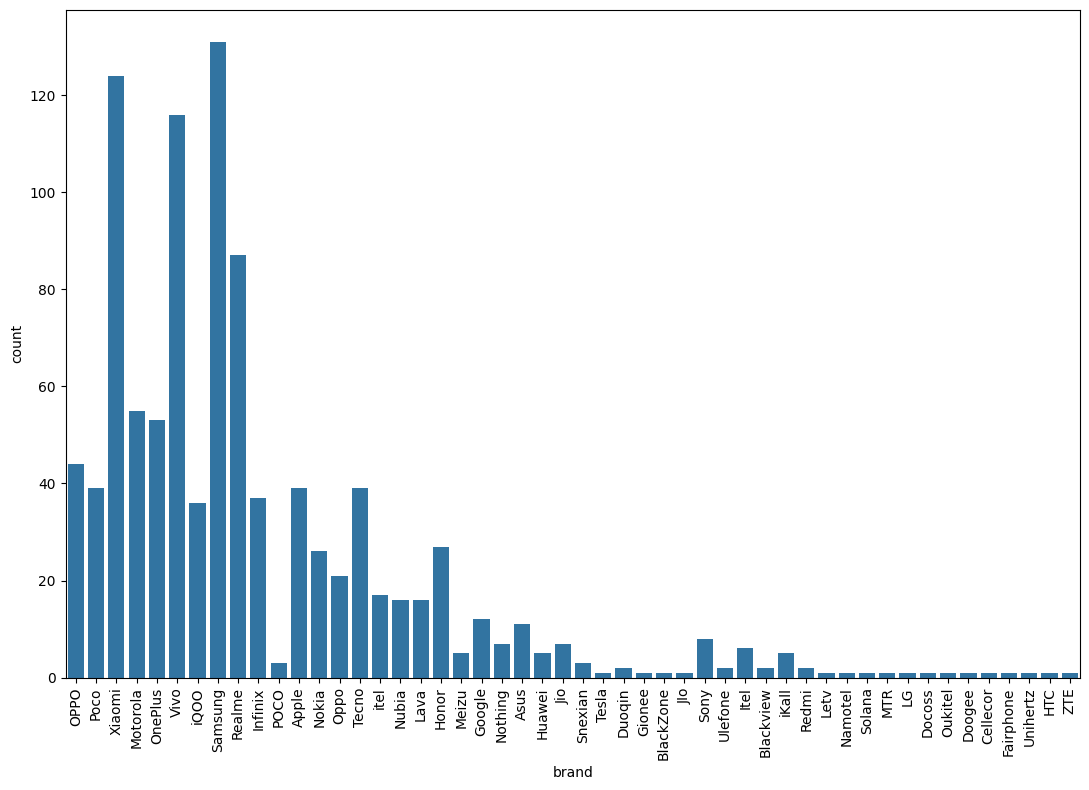

In [64]:
plt.figure(figsize=(11,8))
sns.countplot(x='brand', data=df)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

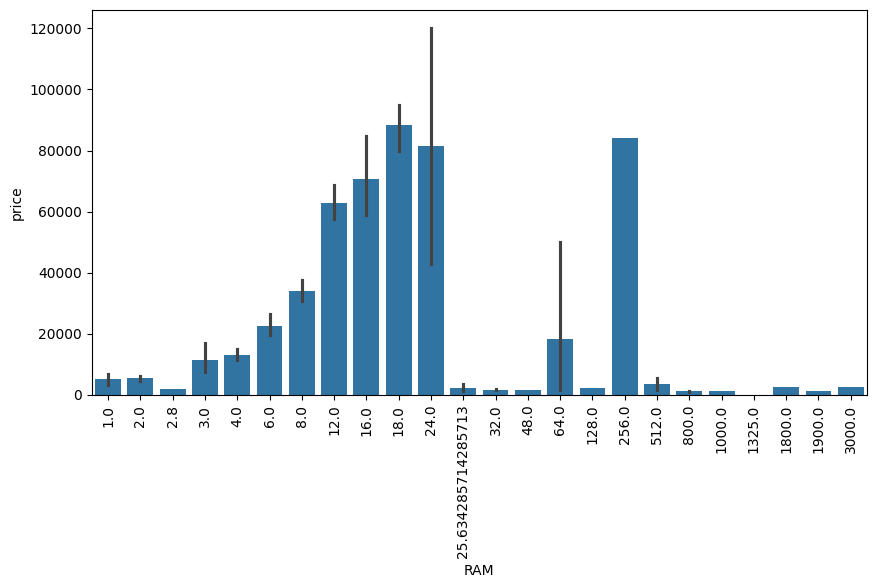

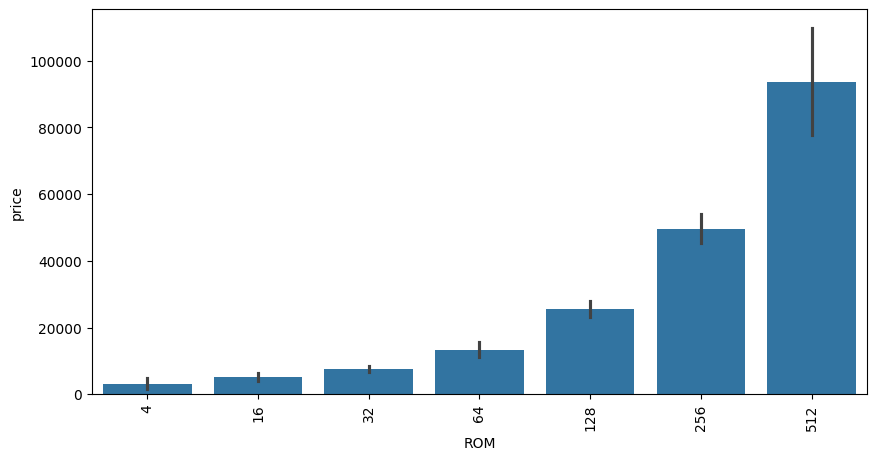

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'RAM' , y = 'price',data = df)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'ROM' , y = 'price',data = df)
plt.xticks(rotation=90)
plt.show()

In [68]:
import plotly.express as px

In [69]:
fig = px.scatter(
    df,
    x='RAM',
    y='price',
    animation_frame='ROM',
    title='RAM vs Price Animated by ROM',
    labels={'RAM': 'RAM (GB)', 'price': 'Price (INR)', 'ROM': 'Storage'}
)

fig.update_layout(width=800, height=500)
fig.show()

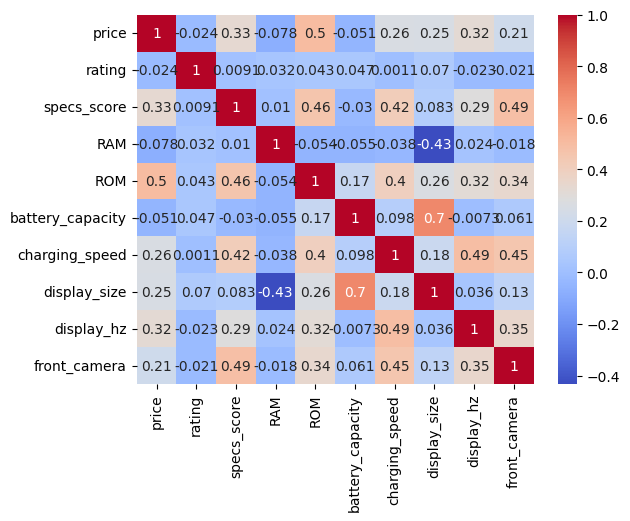

In [71]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True, cmap='coolwarm')
plt.show()